In [1]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Run a small matrix multiplication test
import timeit
cpu_time = timeit.timeit(
    stmt="tf.linalg.matmul(tf.random.normal((1000, 1000)), tf.random.normal((1000, 1000)))",
    setup="import tensorflow as tf",
    number=10
)
print("CPU Time:", cpu_time)

with tf.device('GPU'):
    gpu_time = timeit.timeit(
        stmt="tf.linalg.matmul(tf.random.normal((1000, 1000)), tf.random.normal((1000, 1000)))",
        setup="import tensorflow as tf",
        number=10
    )
print("GPU Time:", gpu_time)


TensorFlow Version: 2.10.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU Time: 1.7208764999995765
GPU Time: 0.007572000000436674


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]# returns first 5 values


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train[:]# returns all values

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
 y_train[4:]# returns all values from index 4 onward in y_train.

array([[1],
       [1],
       [2],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:

y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

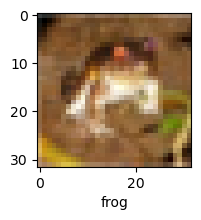

In [14]:
plot_sample(X_train, y_train, 0)

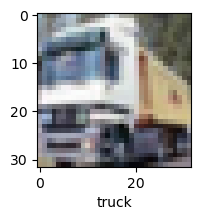

In [15]:
plot_sample(X_train, y_train, 1)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8150 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6221 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5393 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4798 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4317 - accuracy: 0.4962


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.60      0.55      1000
           1       0.78      0.34      0.47      1000
           2       0.29      0.55      0.38      1000
           3       0.37      0.23      0.29      1000
           4       0.49      0.28      0.36      1000
           5       0.37      0.47      0.41      1000
           6       0.65      0.35      0.46      1000
           7       0.48      0.62      0.54      1000
           8       0.61      0.61      0.61      1000
           9       0.51      0.61      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [19]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, LeakyReLU

cnn = models.Sequential([
    # First Conv Block
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Second Conv Block
    Conv2D(64, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Third Conv Block
    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # Added back to maintain consistent feature sizes

    # GlobalAveragePooling Instead of Flatten
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(1000, activation='softmax')  # Output layer for 10 classes
])


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 27s 12ms/step - loss: 1.5033 - accuracy: 0.4649   
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1021 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9633 - accuracy: 0.6620
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8728 - accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7990 - accuracy: 0.7227
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7366 - accuracy: 0.7446
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6958 - accuracy: 0.7594
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6468 - accuracy: 0.7776
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6071 - accuracy: 0.7908
Epoch 10/10
1563/1563 [==============================] - 17s 1

In [22]:
   # Save the Model
cnn.save("asl_cnn_model.h5py")

# Step 6: Evaluate the Model
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%") 

INFO:tensorflow:Assets written to: asl_cnn_model.h5py\assets


INFO:tensorflow:Assets written to: asl_cnn_model.h5py\assets


313/313 [==============================] - 3s 8ms/step - loss: 0.7345 - accuracy: 0.7567
Test Accuracy: 75.67%


In [23]:
import tensorflow as tf
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
True


In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 [==============================] - 2s 5ms/step


array([[6.5492227e-04, 1.1342123e-04, 1.2188485e-02, ..., 7.4655261e-17,
        2.8502256e-16, 7.3757359e-17],
       [5.9659092e-04, 9.0271276e-01, 1.5391695e-08, ..., 6.1243839e-26,
        2.1223124e-25, 2.6221946e-26],
       [1.1783986e-02, 1.3435084e-01, 9.9441706e-05, ..., 9.9570163e-15,
        2.5920794e-14, 7.8848552e-15],
       [2.7841885e-02, 1.0606620e-02, 1.5828500e-05, ..., 1.3902647e-18,
        3.2730116e-18, 7.5929545e-19],
       [3.2407473e-07, 8.5150322e-07, 4.5583386e-04, ..., 3.7494270e-25,
        4.4792354e-24, 1.5916893e-24]], dtype=float32)

In [26]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

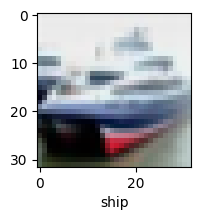

In [ ]:
plot_sample(X_test, y_test,1)

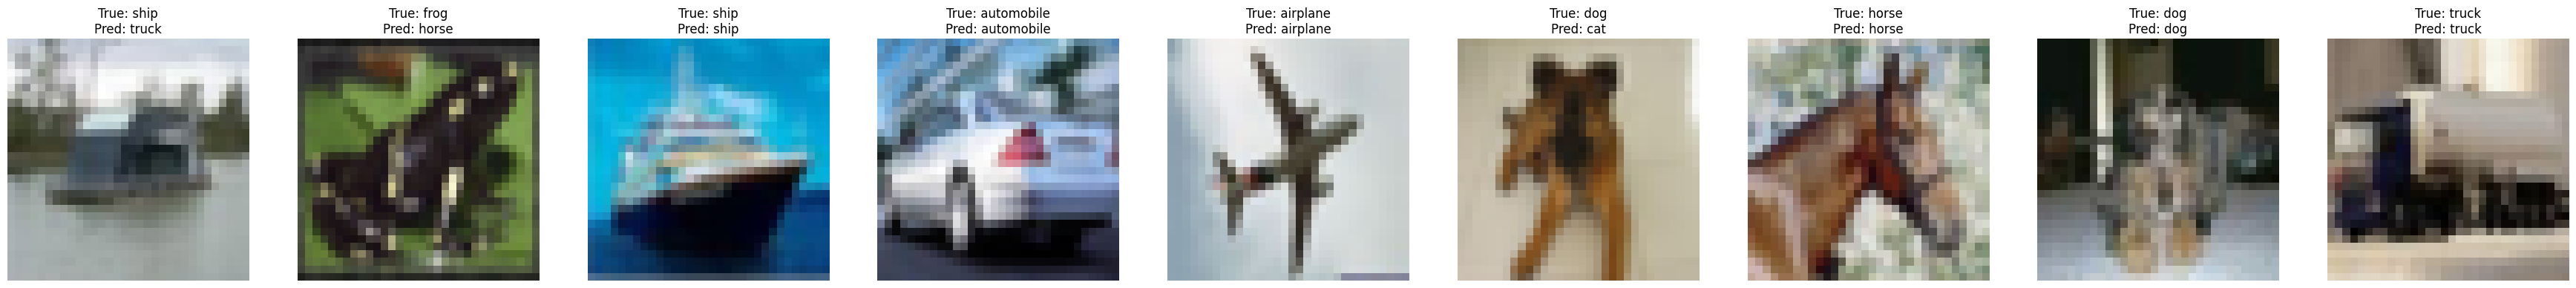

In [ ]:
import random

# Get the predicted classes
y_classes = [np.argmax(element) for element in y_pred]

# Select 5 random indices from X_test
random_indices = random.sample(range(len(X_test)), 9)

# Plot the images along with their true and predicted labels
plt.figure(figsize=(100, 50))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 20, i + 1)
    plt.imshow(X_test[idx])  # Show the image
    plt.title(f"True: {classes[y_test[idx]]}\nPred: {classes[y_classes[idx]]}")
    plt.axis("off")

plt.show()

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
classes[y_classes[1]]

'ship'